### Final Project Submission

* Student name: Christian Lopez 
* Student pace: part time
* Scheduled project review date/time: Tuesday, April 28, 2020
* Instructor name: Eli J. Thomas 
* Blog post URL: https://lopez-christian.github.io/2020-04-25-house-prices-linear-regression-project/

### Sources and Credits:

https://github.com/arseniyturin/dsc-1-final-project-online-ds-sp-000 - arseniyuturin

https://github.com/andrewwongls/dsc-1-final-project-online-ds-sp-000/blob/master/student.ipynb - andrewwongls

https://github.com/arcaputo3/dsc-1-final-project-online-ds-sp-000/blob/master/student.ipynb - arcaputo3

https://github.com/BrittaInData - BrittaInData

https://seaborn.pydata.org/tutorial/aesthetics.html - seaborn

https://becominghuman.ai/stats-models-vs-sklearn-for-linear-regression-f19df95ad99b - statsmodels vs. sklearn

https://github.com/learn-co-curriculum/dsc-ols-statsmodels-lab/tree/solution - OLS in statsmodels lab

https://github.com/learn-co-curriculum/dsc-regression-boston-lab/tree/solution - OLS regression Boston lab

https://github.com/learn-co-students/dsc-linear-regression-section-recap-v2-1-online-ds-pt-120919 - linear regression key takeaways

https://github.com/learn-co-students/dsc-dealing-with-categorical-variables-online-ds-pt-120919 - dealing with categorical variables 

https://github.com/learn-co-curriculum/dsc-dealing-with-categorical-variables-lab/tree/solution - dealing with categorical variables lab

https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution - multicollinearity of features lab 

https://github.com/learn-co-curriculum/dsc-feature-scaling-and-normalization-lab/tree/solution - feature scaling and normalization lab 

https://github.com/learn-co-students/dsc-feature-scaling-and-normalization-online-ds-pt-120919 - feature scaling and normalization 

https://drive.google.com/drive/folders/1v5eCU-94wb-evvhul-Nl60oLITedWJkR - Eli resources 

https://www.statisticshowto.com/adjusted-r2/ - r2 explanation 

https://github.com/learn-co-curriculum/dsc-multiple-linear-regression-statsmodels-lab/tree/solution - multiple linear regression statsmodels lab 

https://github.com/learn-co-curriculum/dsc-model-fit-linear-regression-lab/tree/solution - model-fit linear regression using statsmodels and scikit-learn lab 

https://github.com/learn-co-curriculum/dsc-regression-model-validation-lab/tree/solution - regression model validation lab 

https://github.com/learn-co-curriculum/dsc-cross-validation-lab/tree/solution - cross-validation lab 

https://blog.thedataincubator.com/2017/11/scikit-learn-vs-statsmodels/ - scikit-learn vs. statsmodels

# Project Approach:

For this multiple linear regression project we will be using the kc_house_data.csv dataset. We will obtain the data using the pandas package and retrieve valuable information pertaining to the dataset using its associated modules. We will then scrub the dataset, going column per column, and inspecting for null values and dropping unnecessary columns that we won't be using in our linear regression. There will be some renaming of columns and also creation of dummies that will aid us in the process. The columns with a vast number of null values will be filled in with the median, whereas the columns with not many null values will be filled with 0's. During the exploration phase of this project, we will be creating visualizations using the matplotlib library and also seaborn. We will be creating barplots, scatterplots, and matrices. These visualizations will help us derive particular features that may be of interest to us as we move along. The trends and correlations we observe will help drive our linear regression moving forward. 
    
After completing this initial phase of the project, we will dive right into the moduling phase of the project which encompasses building boxplots to deal with outliers. We will then rely on the powerful linear regression building tool known as scikit-learn. But, first we will need to deal with the categorical and continuous features we will be using. For the categorical features we want, we will be using dummy datasets, whereas for the continuous features, we will be employing lograrithmic transformation and min-max scaling. We will then perform the linear regression looking at valuable information such as the r^2 score, mean absolute error, and the root mean squared error, as well as the average predicted price and the average actual price for that particular model. We will conduct 3 separate trails, all the while switching up the categorical and continous features that we use. For each, we will also perform cross-validation and to test for model accuracy and looking at the significant features we used in the model that were below a p-value of 0.05. 

# Obtaining Data:

In [1]:
# importing modules and packages 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
import warnings
%matplotlib inline 
sns.set(style='dark')
plt.style.use('seaborn')

In [2]:
# loading in dataset and displaying head and tail of dataset

df = pd.read_csv('kc_house_data.csv')
display(df.head())
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [3]:
# shape of the dataset

df.shape

(21597, 21)

In [4]:
# columns of the dataset as a list

df.columns.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']


* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [5]:
# info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
# description of the dataset

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Scrubbing Data:

In [7]:
# quantity of null values for each column

df.isnull().sum().sort_values(ascending=False)

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

### dealing with date column and separating into year and month columns:

In [8]:
# change date column to a datetime object

df['date'] = pd.to_datetime(df.date)

# making columns sale_yr and sale_month by retrieiving year and month from date column

df['sale_yr'] = pd.DatetimeIndex(df['date']).year
df['sale_month'] = pd.DatetimeIndex(df['date']).month

### dealing with basement column:

In [9]:
# unique values for sqft_basement column

df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [10]:
# changing '?' values to 0 in sqft_basement column and also changing the type to float 

df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')

In [11]:
# converting sqft_basement column into either basement or no basement 

bins = [ -1 , 1 , df.sqft_basement.max() ]
labels = ['0','1']

df.sqft_basement = pd.cut(df.sqft_basement, bins, labels=labels)
df.sqft_basement = df.sqft_basement.astype('category')
sqft_basement = pd.get_dummies(df.sqft_basement, prefix='basement', drop_first=True)
df = df.join([sqft_basement])
df.drop(['sqft_basement'], axis=1, inplace=True)

In [12]:
# rename basement_1 column to basement

df = df.rename(columns = {'basement_1':'basement'})

In [13]:
# retrieving value counts of basement column and sorting them in descending order 

df.basement.value_counts().sort_values(ascending=False)

0    13280
1     8317
Name: basement, dtype: int64

### dealing with yr_renovated column:

In [14]:
# value counts for yr_renovated column

df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [15]:
# converting yr_renovated na values into .median() and the type changed to int

df['yr_renovated'].fillna(df['yr_renovated'].median(), inplace = True) 
df.yr_renovated = df.yr_renovated.astype('int')

In [16]:
# value counts of yr_renovated column and sorting them in descending order 

df.yr_renovated.value_counts().sort_values(ascending=False)

0       20853
2014       73
2003       31
2013       31
2007       30
        ...  
1971        1
1934        1
1959        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

### dealing with waterfront column:

In [17]:
# value counts for waterfront column

df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [18]:
# any na values in the waterfront column are changed to .median() and the type changed to int 

df['waterfront'].fillna(df['waterfront'].median(), inplace = True)
df.waterfront= df.waterfront.astype('int')

In [19]:
# value counts of waterfront column and sorting them in descending order 

df.waterfront.value_counts().sort_values(ascending=False)

0    21451
1      146
Name: waterfront, dtype: int64

### dealing with view column:

In [20]:
# value counts for view column

df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [21]:
# any na values in the view column are changed to 0 and the type changed to int

df.loc[df.view.isna(), 'view'] = 0
df.view = df.view.astype('int')

In [22]:
# value counts of view column and sorting them in descending order 

df.view.value_counts().sort_values(ascending=False)

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

### final touches:

In [23]:
# sum of na values for each column, they should all be 0

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sale_yr          0
sale_month       0
basement         0
dtype: int64

In [24]:
# info for the dataset after changing the types certain columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
sale_yr          21597 non-null int64
sale_month       21597 non-null int64
basement         21597 non-null uint

### scatter maps:

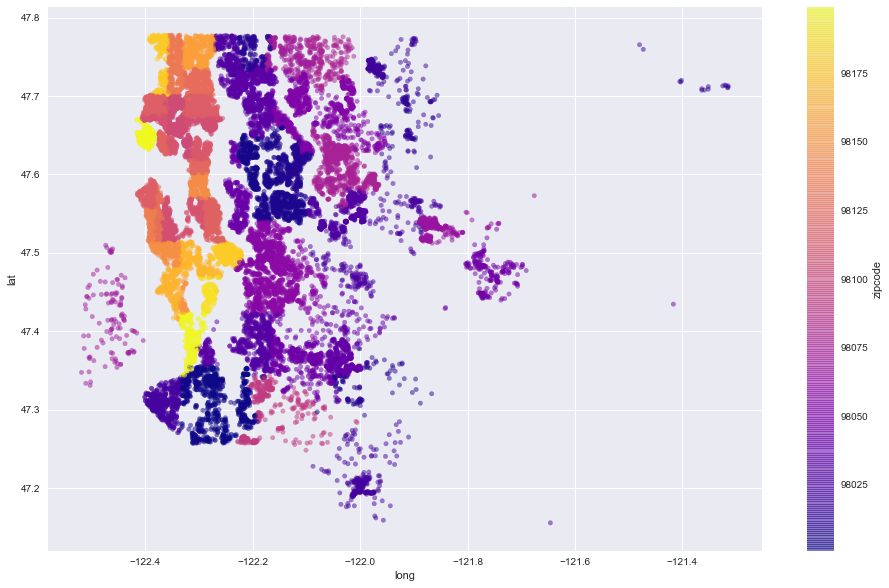

In [25]:
# plotting the lat and long on a map and coding it according to zipcode 

df.plot(kind='scatter', x='long', y='lat',
        alpha=.5, figsize=(16,10), c='zipcode', cmap='plasma', sharey=True, sharex=False);

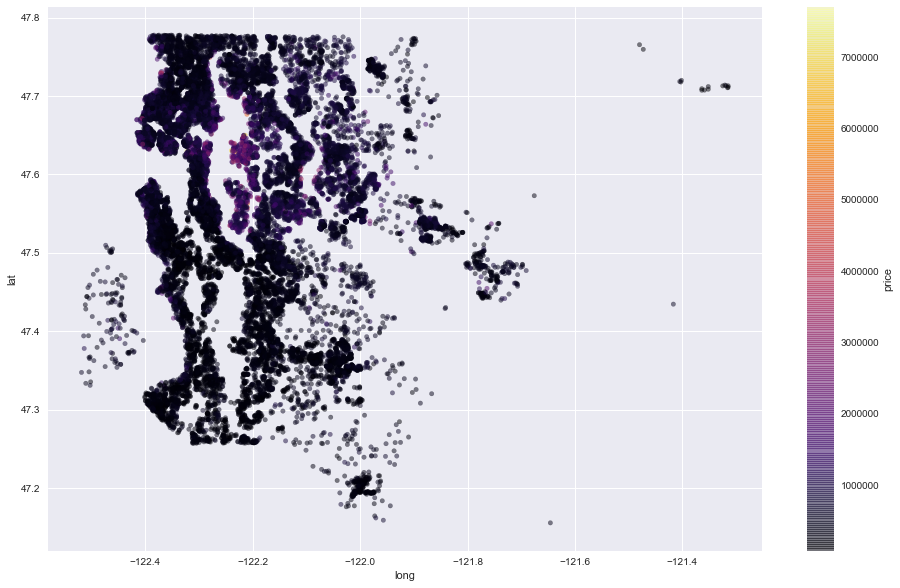

In [26]:
# plotting the lat and long on a map and coding it according to price 

df.plot(kind='scatter', x='long', y='lat',
        alpha=.5, figsize=(16,10), c='price', cmap='inferno', sharey=True, sharex=False);

### dropping columns:

In [27]:
# dropping irrelevant columns from dataset

df = df.drop(columns=['date','sqft_above','sqft_living15','sqft_lot15','id','lat','long']) 

### final dataframe to work with:

In [28]:
# displaying head and tail of final dataset 

display(df.head())
display(df.tail())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,sale_yr,sale_month,basement
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178,2014,10,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125,2014,12,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028,2015,2,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136,2014,12,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074,2015,2,0


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,sale_yr,sale_month,basement
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,2009,0,98103,2014,5,0
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2014,0,98146,2015,2,0
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,2009,0,98144,2014,6,0
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,2004,0,98027,2015,1,0
21596,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,2008,0,98144,2014,10,0


In [29]:
# info of final dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
price           21597 non-null float64
bedrooms        21597 non-null int64
bathrooms       21597 non-null float64
sqft_living     21597 non-null int64
sqft_lot        21597 non-null int64
floors          21597 non-null float64
waterfront      21597 non-null int64
view            21597 non-null int64
condition       21597 non-null int64
grade           21597 non-null int64
yr_built        21597 non-null int64
yr_renovated    21597 non-null int64
zipcode         21597 non-null int64
sale_yr         21597 non-null int64
sale_month      21597 non-null int64
basement        21597 non-null uint8
dtypes: float64(3), int64(12), uint8(1)
memory usage: 2.5 MB


# Exploring Data:

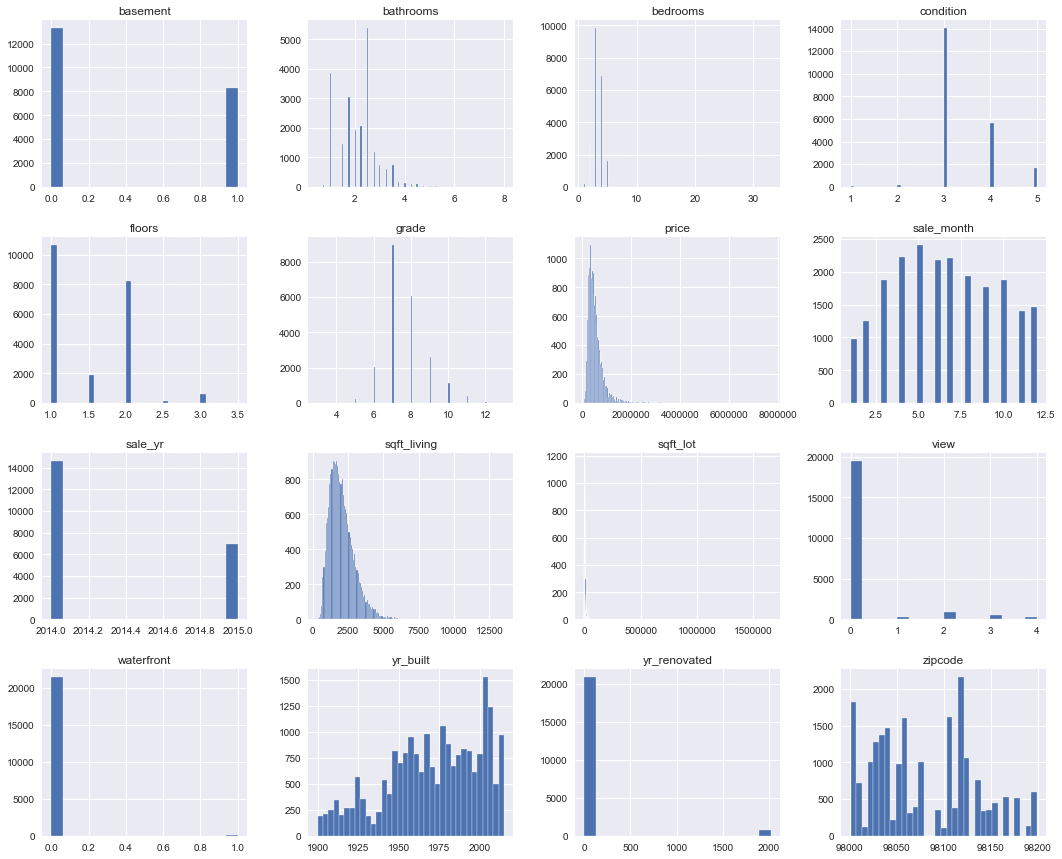

In [30]:
# histograms across all columns

df.hist(figsize=(18,15), bins='auto');

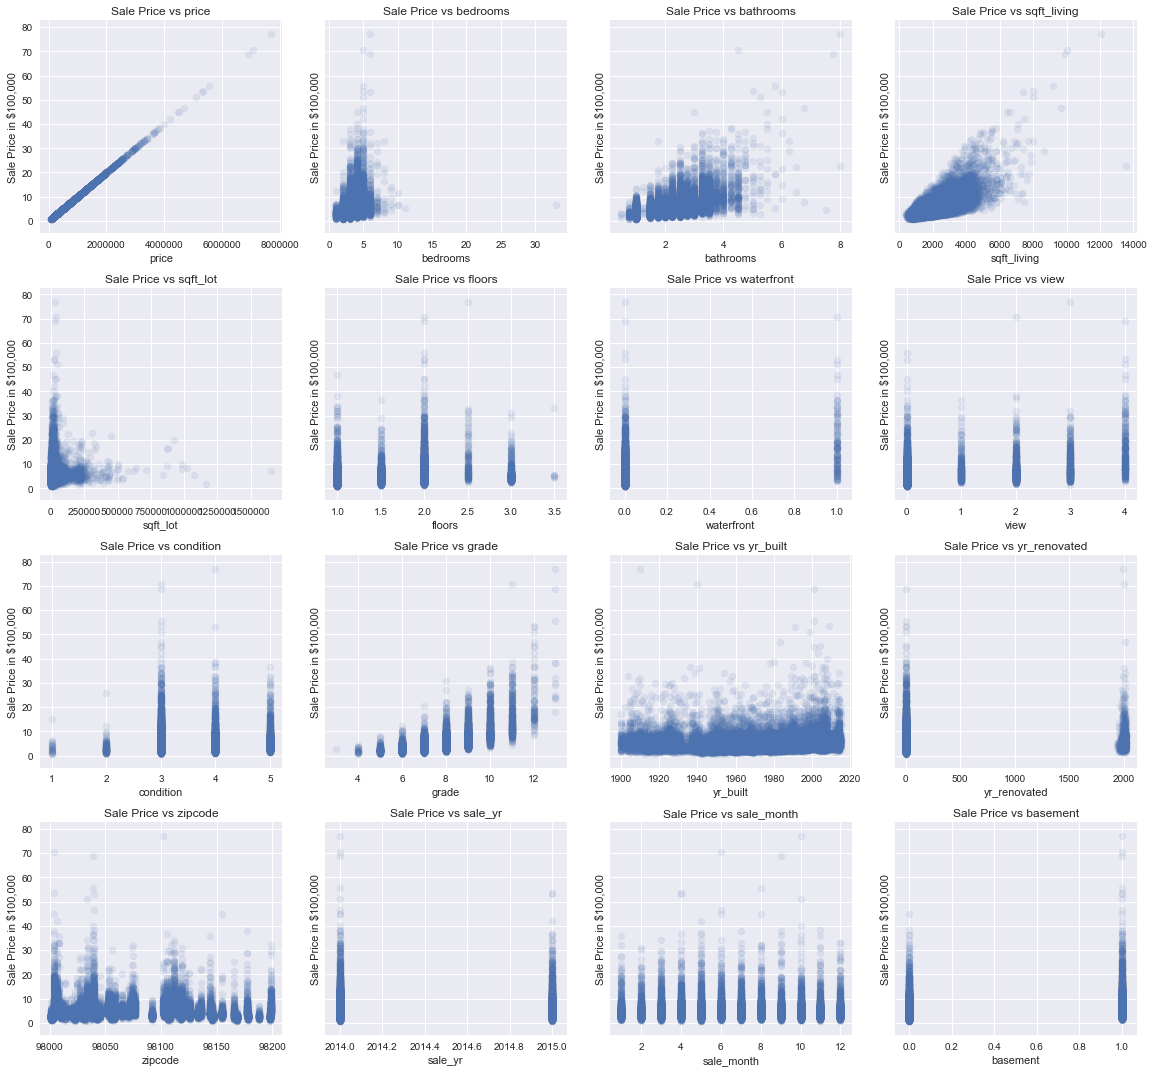

In [31]:
# scatterplots across all columns

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

### correlation visualizations:

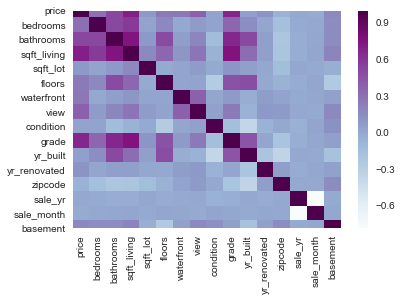

In [34]:
# correlational heatmap comparing all features of the dataset

sns.heatmap(df.corr(), cmap="BuPu");

In [33]:
# correlational values comparing all features

df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,sale_yr,sale_month,basement
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.053953,0.117855,-0.053402,0.003727,-0.009928,0.178264
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.155670,0.017900,-0.154092,-0.009949,-0.001046,0.158412
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.507173,0.047177,-0.204786,-0.026577,0.007543,0.159863
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.318152,0.051060,-0.199802,-0.029014,0.012112,0.201198
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.052946,0.004979,-0.129586,0.005628,-0.002591,-0.034889
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.489193,0.003793,-0.059541,-0.022352,0.014245,-0.252465
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,-0.024487,0.073939,0.028923,-0.005018,0.008199,0.039220
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,-0.054452,0.090339,0.085059,0.001239,-0.005161,0.176905
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.361592,-0.055808,0.002888,-0.045898,0.022388,0.130542
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,0.447865,0.015623,-0.185771,-0.030635,0.008989,0.050701


In [35]:
# correlational map with levels of precision

corr = df.corr()
corr.style.background_gradient(cmap='viridis').set_precision(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,sale_yr,sale_month,basement
price,1,0.309,0.526,0.702,0.0899,0.257,0.264,0.393,0.0361,0.668,0.054,0.118,-0.0534,0.00373,-0.00993,0.178
bedrooms,0.309,1,0.515,0.578,0.0325,0.178,-0.00213,0.0784,0.0265,0.357,0.156,0.0179,-0.154,-0.00995,-0.00105,0.158
bathrooms,0.526,0.515,1,0.756,0.0884,0.503,0.0636,0.186,-0.126,0.666,0.507,0.0472,-0.205,-0.0266,0.00754,0.16
sqft_living,0.702,0.578,0.756,1,0.173,0.354,0.105,0.282,-0.0594,0.763,0.318,0.0511,-0.2,-0.029,0.0121,0.201
sqft_lot,0.0899,0.0325,0.0884,0.173,1,-0.00481,0.0215,0.0751,-0.00883,0.115,0.0529,0.00498,-0.13,0.00563,-0.00259,-0.0349
floors,0.257,0.178,0.503,0.354,-0.00481,1,0.0208,0.0284,-0.264,0.459,0.489,0.00379,-0.0595,-0.0224,0.0142,-0.252
waterfront,0.264,-0.00213,0.0636,0.105,0.0215,0.0208,1,0.381,0.0166,0.0828,-0.0245,0.0739,0.0289,-0.00502,0.0082,0.0392
view,0.393,0.0784,0.186,0.282,0.0751,0.0284,0.381,1,0.0456,0.249,-0.0545,0.0903,0.0851,0.00124,-0.00516,0.177
condition,0.0361,0.0265,-0.126,-0.0594,-0.00883,-0.264,0.0166,0.0456,1,-0.147,-0.362,-0.0558,0.00289,-0.0459,0.0224,0.131
grade,0.668,0.357,0.666,0.763,0.115,0.459,0.0828,0.249,-0.147,1,0.448,0.0156,-0.186,-0.0306,0.00899,0.0507


### scatter matrix:

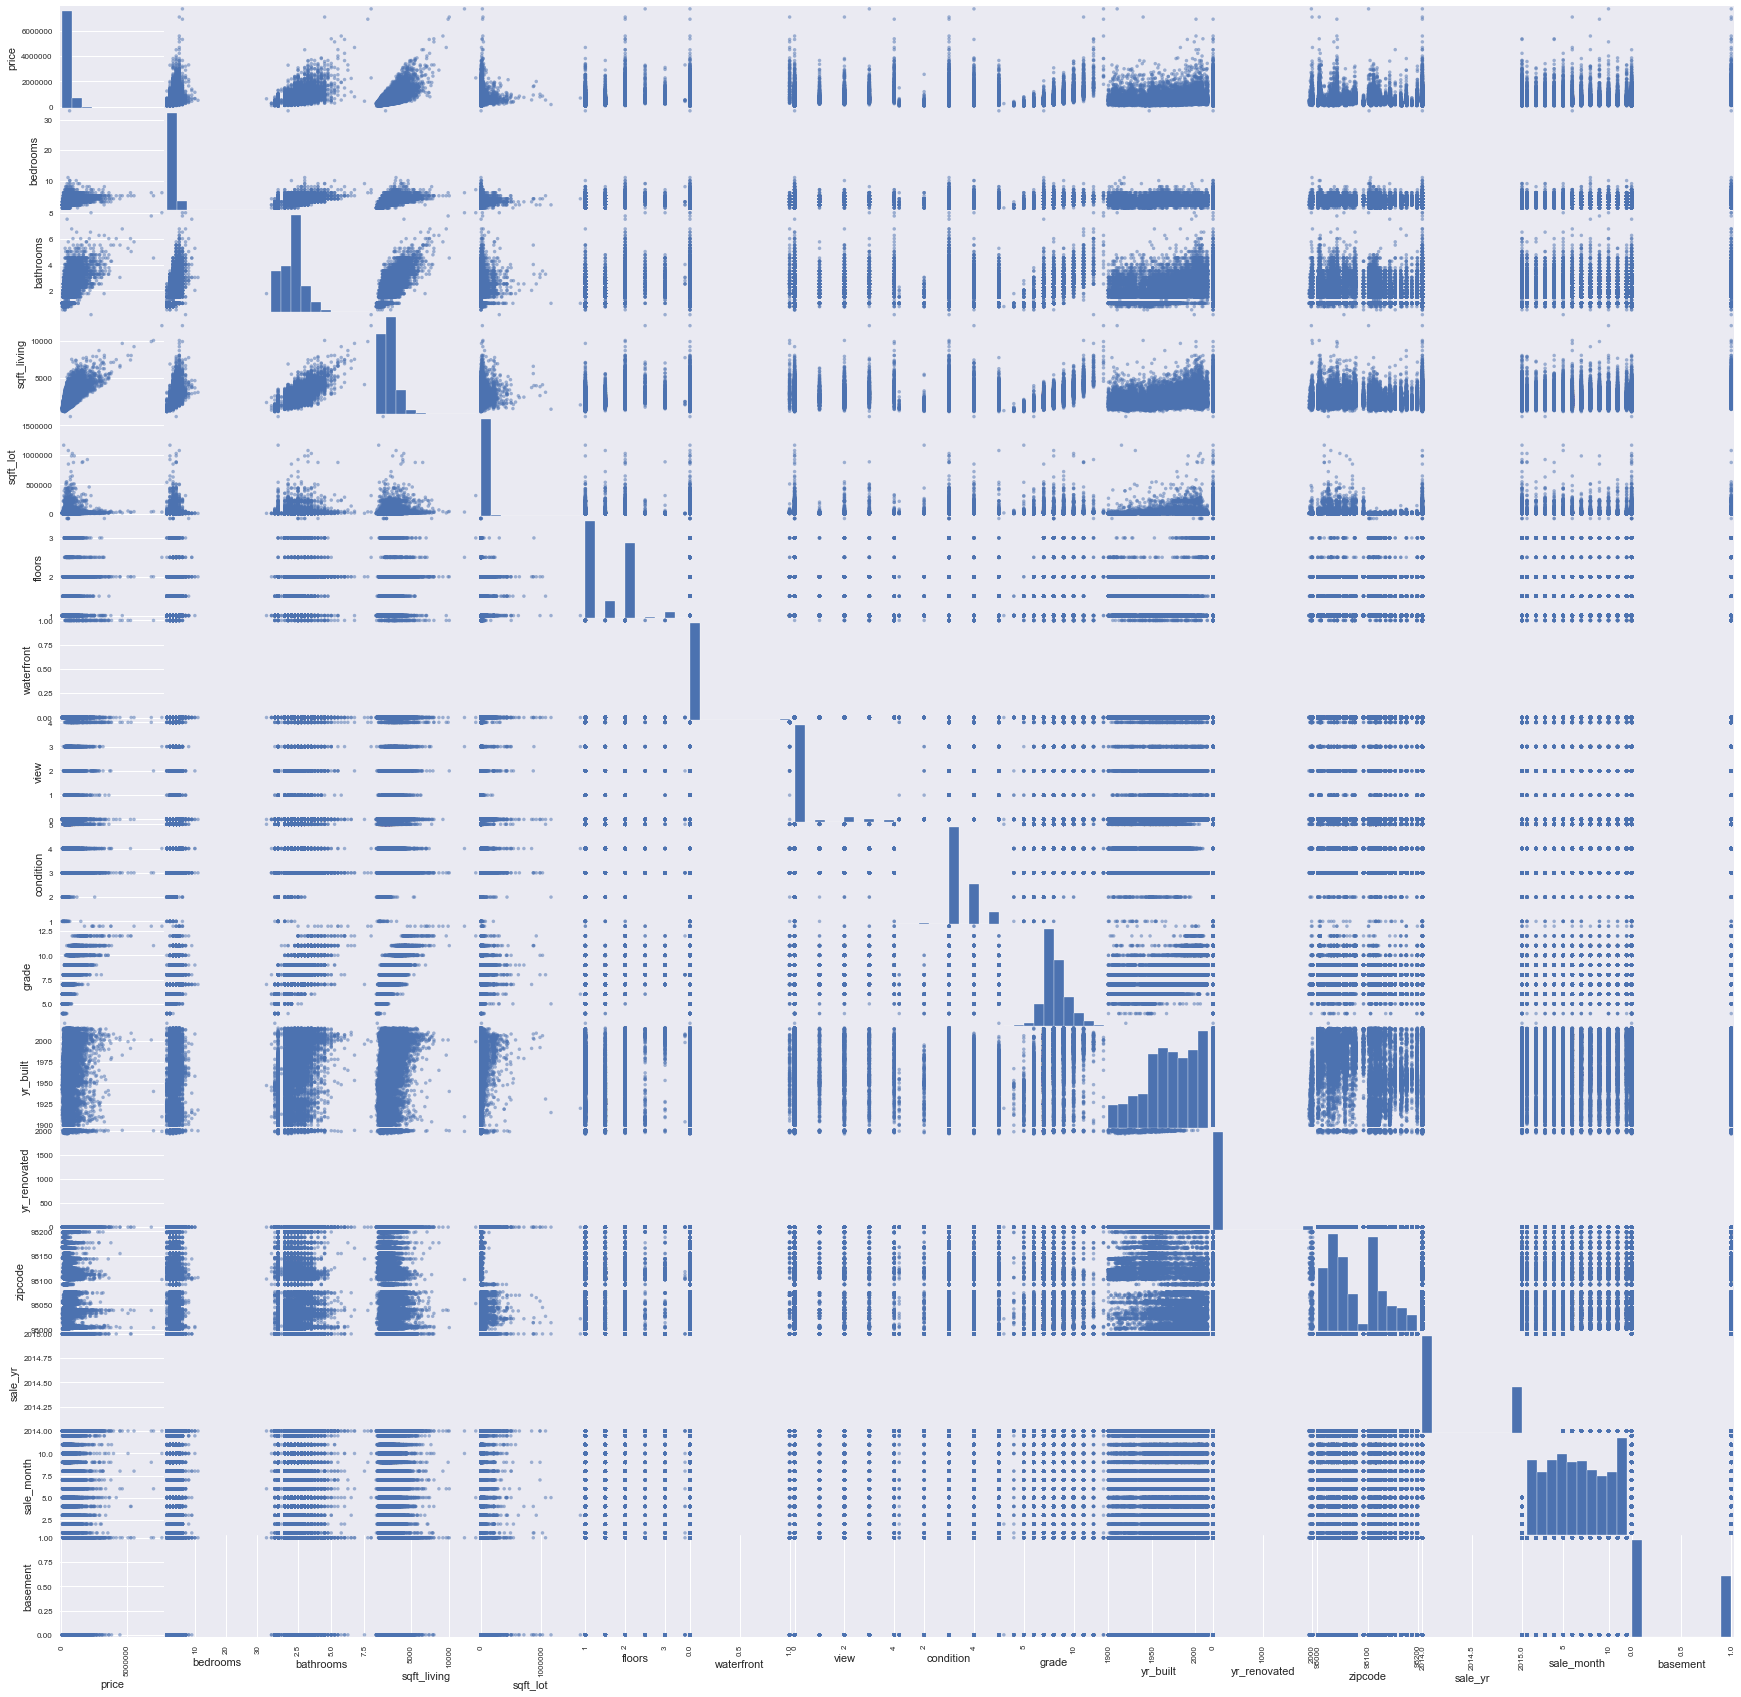

In [36]:
# scatter matrix plotting every feature against each other 

pd.plotting.scatter_matrix(df, figsize = [30,30]);
plt.show()

### seaborn pairplots:

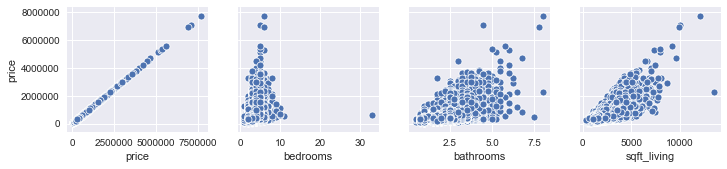

In [37]:
# pairplot of certain features from the dataset vs. price 

sns.pairplot(data=df, x_vars=['price','bedrooms','bathrooms','sqft_living'], y_vars=['price']);

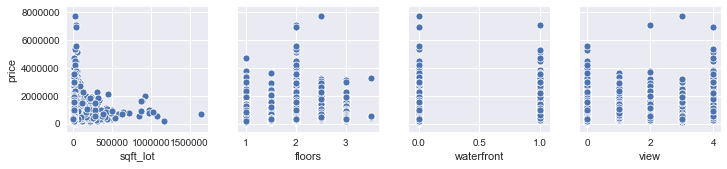

In [38]:
# pairplot of certain features from the dataset vs. price 

sns.pairplot(data=df, x_vars=['sqft_lot','floors','waterfront','view'], y_vars=['price']);

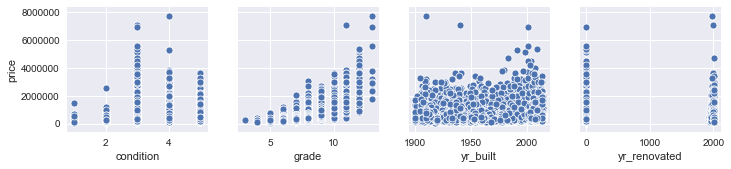

In [39]:
# pairplot of certain features from the datset vs. price

sns.pairplot(data=df, x_vars=['condition','grade','yr_built','yr_renovated'], y_vars=['price']);

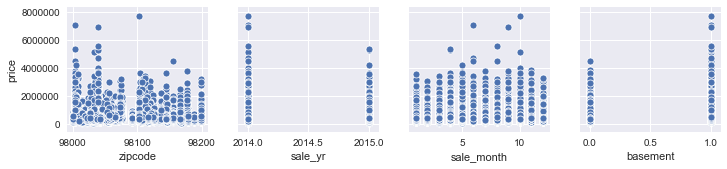

In [40]:
# pairplot of certain features from the dataset vs. price

sns.pairplot(data=df, x_vars=['zipcode','sale_yr','sale_month','basement'], y_vars=['price']);

### exploring bedrooms column:

In [41]:
# value counts for bedrooms in sorting them in descending order 

df.bedrooms.value_counts().sort_values(ascending=False)

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

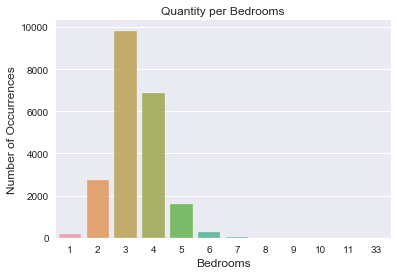

In [42]:
# barplot of bedrooms vs. number of occurrences 

bedrooms  = df['bedrooms'].value_counts()
sns.barplot(bedrooms.index, bedrooms.values, alpha=0.8)
plt.title('Quantity per Bedrooms')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Bedrooms', fontsize=12)
plt.show()

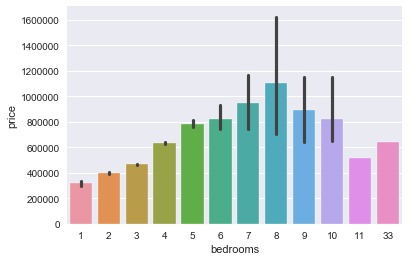

In [43]:
# barplot of bedrooms vs. price 

sns.barplot(x="bedrooms", y="price", data=df);

### exploring bathrooms column:

In [44]:
# value counts for bathrooms and sorting them in descending order 

df.bathrooms.value_counts().sort_values(ascending=False)

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

### exploring floors column:

In [45]:
# value counts for floors and sorting them in descending order 

df.floors.value_counts().sort_values(ascending=False)

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

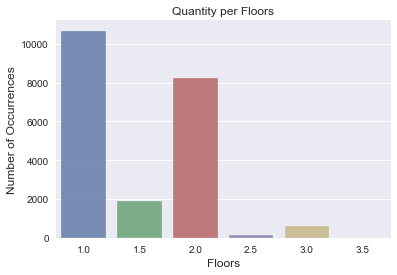

In [46]:
# barplot of floors vs. number of occurrences 

floors  = df['floors'].value_counts()
sns.barplot(floors.index, floors.values, alpha=0.8)
plt.title('Quantity per Floors')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Floors', fontsize=12)
plt.show()

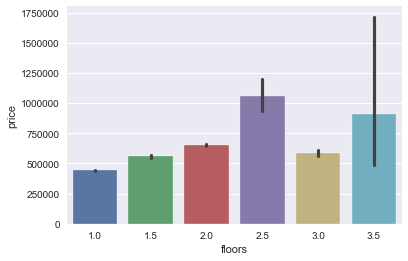

In [47]:
# barplot of floors vs. price

sns.barplot(x="floors", y="price", data=df);

### exploring waterfront column:

In [48]:
# value counts for waterfront and sorting them in descending order 

df.waterfront.value_counts().sort_values(ascending=False)

0    21451
1      146
Name: waterfront, dtype: int64

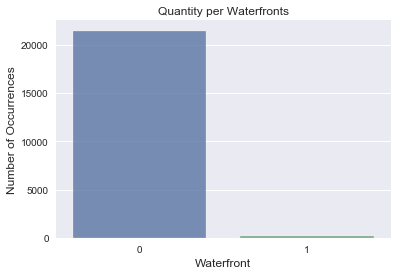

In [49]:
# barplot of waterfront vs. number of occurrences 

waterfronts  = df['waterfront'].value_counts()
sns.barplot(waterfronts.index, waterfronts.values, alpha=0.8)
plt.title('Quantity per Waterfronts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Waterfront', fontsize=12)
plt.show()

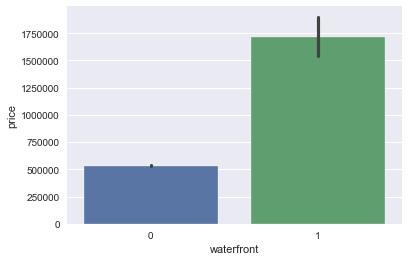

In [50]:
# barplot of waterfront vs. price 

sns.barplot(x="waterfront", y="price", data=df);

### exploring view column:

In [51]:
# value counts for views and sorting them in descending order 

df.view.value_counts().sort_values(ascending=False)

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

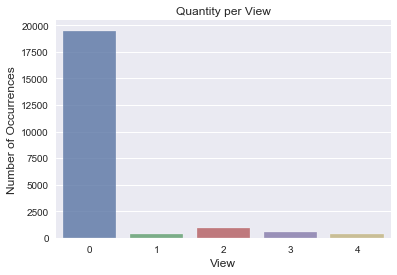

In [52]:
# barplot of view vs. number of occurrences 

views  = df['view'].value_counts()
sns.barplot(views.index, views.values, alpha=0.8)
plt.title('Quantity per View')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('View', fontsize=12)
plt.show()

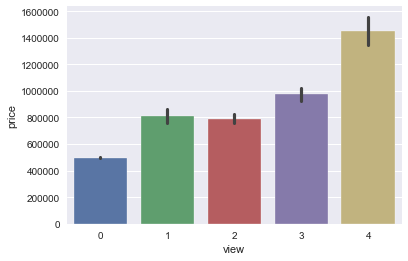

In [53]:
# barplot of view vs. price 

sns.barplot(x="view", y="price", data=df);

### exploring condition column:

In [54]:
# value counts of condition and sorting them in descending order 

df.condition.value_counts().sort_values(ascending=False)

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

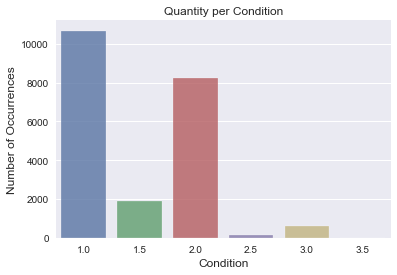

In [55]:
# barplot of condition vs. number of occurrences 

conditions  = df['condition'].value_counts()
sns.barplot(floors.index, floors.values, alpha=0.8)
plt.title('Quantity per Condition')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Condition', fontsize=12)
plt.show()

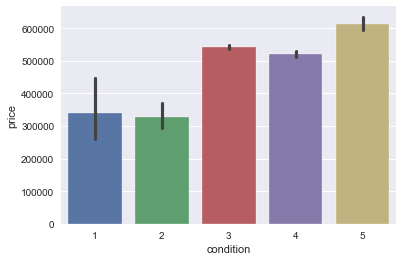

In [56]:
# barplot of condition vs. price 

sns.barplot(x="condition", y="price", data=df);

### exploring grade column:

In [57]:
# value counts for grades and sorting them in descending order 

df.grade.value_counts().sort_values(ascending=False)

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

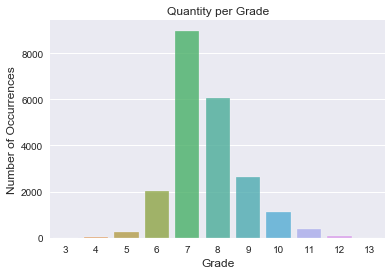

In [58]:
# bar graph of grade vs. number of occurrences 

grades  = df['grade'].value_counts()
sns.barplot(grades.index, grades.values, alpha=0.8)
plt.title('Quantity per Grade')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Grade', fontsize=12)
plt.show()

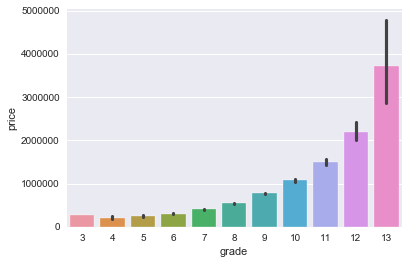

In [59]:
# barplot of grade vs. price 

sns.barplot(x="grade", y="price", data=df);

### exploring yr_built column:

In [60]:
# value counts for yr_built and sorting them in descending order

df.yr_built.value_counts().sort_values(ascending=False)

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

### exploring yr_renovated column:

In [61]:
# value counts for yr_renovated and sorting them in descending order 

df.yr_renovated.value_counts().sort_values(ascending=False)

0       20853
2014       73
2003       31
2013       31
2007       30
        ...  
1971        1
1934        1
1959        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

### exploring sale_yr column:

In [62]:
# value counts for sale_yr column and sorting them in descending order

df.sale_yr.value_counts().sort_values(ascending=False)

2014    14622
2015     6975
Name: sale_yr, dtype: int64

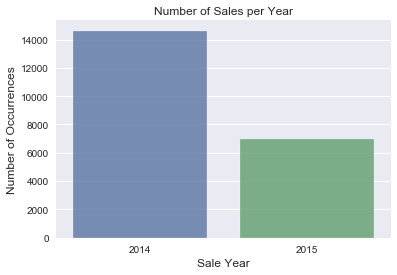

In [63]:
# barplot of sale_yr vs. number of occurrences 

sale_yr  = df['sale_yr'].value_counts()
sns.barplot(sale_yr.index, sale_yr.values, alpha=0.8)
plt.title('Number of Sales per Year')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sale Year', fontsize=12)
plt.show()

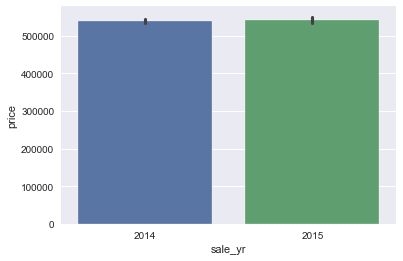

In [64]:
# barplot of sale_yr vs. price

sns.barplot(x="sale_yr", y="price", data=df);

### exploring sale_month column:

In [65]:
# value counts of sale_month column and sorting them in descending order 

df.sale_month.value_counts().sort_values(ascending=False)

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: sale_month, dtype: int64

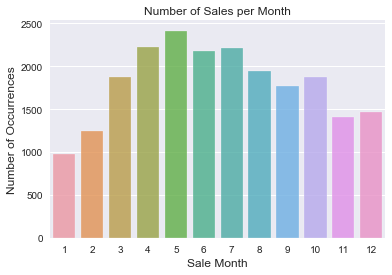

In [66]:
# barplot of sale_month vs. number of occurrences 

sale_month  = df['sale_month'].value_counts()
sns.barplot(sale_month.index, sale_month.values, alpha=0.8)
plt.title('Number of Sales per Month')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sale Month', fontsize=12)
plt.show()

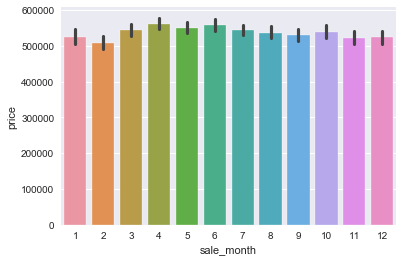

In [67]:
# barplot of sale_month vs. price 

sns.barplot(x="sale_month", y="price", data=df);

### exploring basement column:

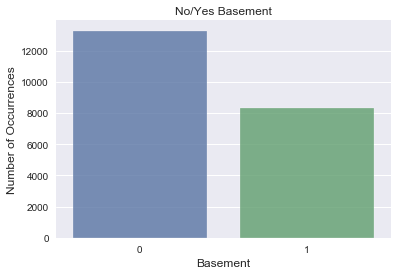

In [68]:
# barplot of basement vs. number of occurrences 

basement  = df['basement'].value_counts()
sns.barplot(basement.index, basement.values, alpha=0.8)
plt.title('No/Yes Basement')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Basement', fontsize=12)
plt.show()

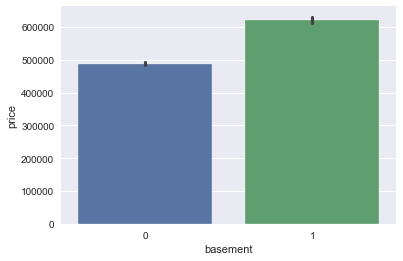

In [69]:
# barplot of basement vs. price 

sns.barplot(x="basement", y="price", data=df);

# Modeling Data:

### dealing with outliers:

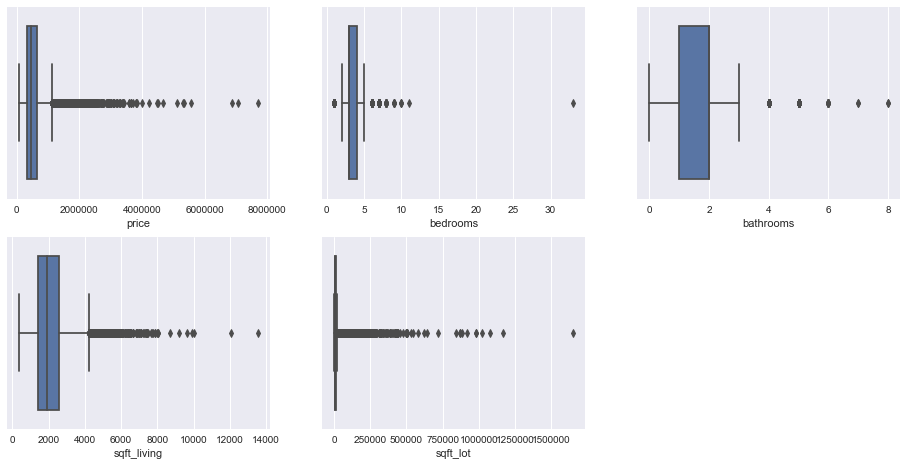

In [70]:
# boxplots on certain features that contain a great deal of outliers

plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df.price)
plt.subplot(332)
sns.boxplot(df.bedrooms)
plt.subplot(333)
sns.boxplot(df.bathrooms.astype('int'))
plt.subplot(334)
sns.boxplot(df.sqft_living)
plt.subplot(335)
sns.boxplot(df.sqft_lot);

In [102]:
# getting rid of those outliers to drive our linear regression

df = df[df.price < 4000000]
df = df[df.bedrooms < 5]
df = df[df.bathrooms < 4]
df = df[df.sqft_living < 8000]
df = df[df.sqft_lot < 500000]

In [103]:
# creating copies of the dataframe which will be used in the trial linear regressions

trial_df1 = df.copy()
trial_df2 = df.copy()
trial_df3 = df.copy()

In [73]:
# looking at the head of the dataframe as a check 

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,sale_yr,sale_month,basement
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178,2014,10,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125,2014,12,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028,2015,2,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136,2014,12,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074,2015,2,0


###  trial 1 - dealing with features and building linear regression model (all features):

In [74]:
# dealing with all the categorical features from the dataset 

trial_df1.bedrooms = trial_df1.bedrooms.astype('category')
trial_df1.bathrooms = trial_df1.bathrooms.astype('int').astype('category')
trial_df1.floors = trial_df1.floors.astype('category')
trial_df1.waterfront = trial_df1.waterfront.astype('category')
trial_df1.view = trial_df1.view.astype('category')
trial_df1.condition = trial_df1.condition.astype('category')
trial_df1.grade = trial_df1.grade.astype('category')
trial_df1.yr_built = trial_df1.yr_built.astype('category')
trial_df1.yr_renovated = trial_df1.yr_renovated.astype('category')
trial_df1.zipcode = trial_df1.zipcode.astype('category')
trial_df1.sale_yr = trial_df1.sale_yr.astype('category')
trial_df1.sale_month = trial_df1.sale_month.astype('category')
trial_df1.basement = trial_df1.basement.astype('category')

In [75]:
# making dummies for all the categorical features 

bedrooms = pd.get_dummies(trial_df1.bedrooms, prefix='bedrooms', drop_first=True)
bathrooms = pd.get_dummies(trial_df1.bathrooms, prefix='bathrooms', drop_first=True)
floors = pd.get_dummies(trial_df1.floors, prefix='floors', drop_first=True)
waterfront = pd.get_dummies(trial_df1.waterfront, prefix='floors', drop_first=True)
view = pd.get_dummies(trial_df1.view, prefix='view', drop_first=True)
condition = pd.get_dummies(trial_df1.condition, prefix='condition', drop_first=True)
grade = pd.get_dummies(trial_df1.grade, prefix='grade', drop_first=True)
yr_built = pd.get_dummies(trial_df1.yr_built, prefix='yr_built', drop_first=True)
yr_renovated = pd.get_dummies(trial_df1.yr_renovated, prefix='yr_renovated', drop_first=True)
zipcode = pd.get_dummies(trial_df1.zipcode, prefix='zipcode', drop_first=True)
sale_yr = pd.get_dummies(trial_df1.sale_yr, prefix='sale_yr', drop_first=True)
sale_month = pd.get_dummies(trial_df1.sale_month, prefix='sale_month', drop_first=True)
basement = pd.get_dummies(trial_df1.basement, prefix='basement', drop_first=True)

In [76]:
# adding dummies to the dataset and removing the original features 

trial_df1 = trial_df1.join([bedrooms, bathrooms, floors, waterfront, view, condition, grade, yr_built, yr_renovated, zipcode, sale_yr, sale_month, basement])
trial_df1.drop(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'sale_yr', 'sale_month', 'basement'], axis=1, inplace=True)

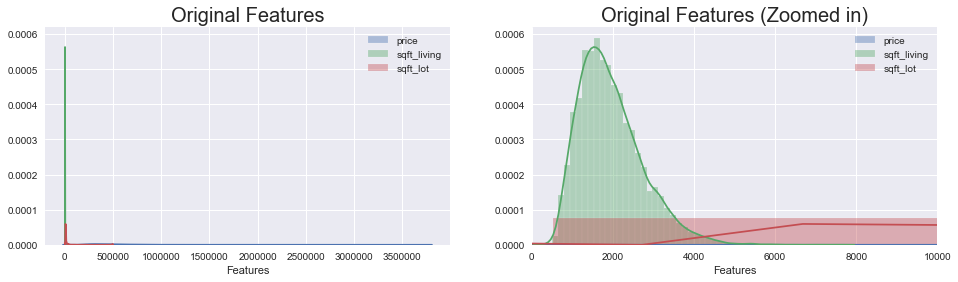

In [77]:
# displots on the continuous features from the dataset

plt.figure(figsize=(16,4))
plt.subplot(121)
sns.distplot(trial_df1.price, label='price')
sns.distplot(trial_df1.sqft_living, label='sqft_living')
sns.distplot(trial_df1.sqft_lot, label='sqft_lot')
plt.title('Original Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()

plt.subplot(122)
sns.distplot(trial_df1.price, label='price')
sns.distplot(trial_df1.sqft_living, label='sqft_living')
sns.distplot(trial_df1.sqft_lot, label='sqft_lot')
plt.title('Original Features (Zoomed in)', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.xlim(0, 10000)
plt.legend()
plt.show()

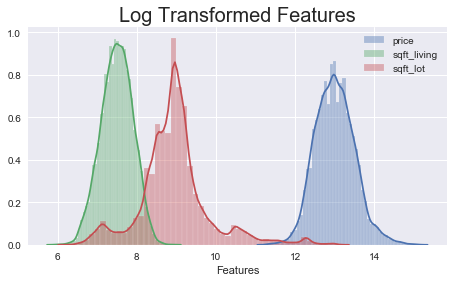

In [78]:
# logarithmic transformation on the continuous features 

price = np.log(trial_df1.price)
sqft_living = np.log(trial_df1.sqft_living)
sqft_lot = np.log(trial_df1.sqft_lot)

plt.figure(figsize=(7.5,4))
sns.distplot(price, label='price')
sns.distplot(sqft_living, label='sqft_living')
sns.distplot(sqft_lot, label='sqft_lot')

plt.title('Log Transformed Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

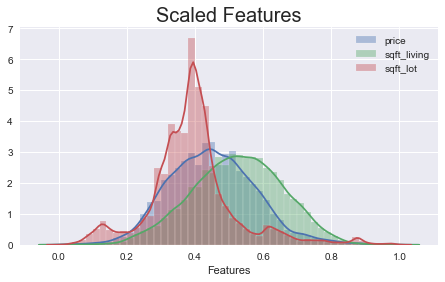

In [79]:
# performing min-max scaling on continuous features 

trial_df1['price'] = ( price - min(price) ) / ( max(price) - min(price) )
trial_df1['sqft_living'] = ( sqft_living - min(sqft_living) ) / ( max(sqft_living) - min(sqft_living) )
trial_df1['sqft_lot'] = ( sqft_lot - min(sqft_lot) ) / ( max(sqft_lot) - min(sqft_lot) )

plt.figure(figsize=(7.5,4))
sns.distplot(trial_df1.price, label='price')
sns.distplot(trial_df1.sqft_living, label='sqft_living')
sns.distplot(trial_df1.sqft_lot, label='sqft_lot')
plt.title('Scaled Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

In [80]:
# set of functions to be used in performing the scikit-learn linear regression and validating the results 

def linear_regression(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    # errors
    print('R^2 Score:',round(linreg.score(X, y),2))
    print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),5))
    print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))
    print('-----------------------------------')
    print('Average Predicted Price:', round(y_pred.mean(),4))
    print('Average Actual Price:', round(y_test.mean(), 4))
    
    # visualization of selection of 200 house prices 
    plt.figure(figsize=(16,6))
    sns.lineplot(range(len(y_pred[:200])), y_pred[:200], label='Predicted Prices')
    sns.lineplot(range(len(y_pred[:200])), y_test[:200], label='Actual Prices')
    plt.title('Comparing predicted price vs actual price', fontdict={'fontsize': 20}), plt.xlabel('Values'), plt.ylabel('Prices')
    plt.legend(), plt.show()
    return (linreg, y_pred, y_test)

def cross_validation(X, y, cv=15, show_scores=False):
    score = cross_val_score(linreg, X, y, cv=cv, scoring="r2")
    print('Model Accuracy:',round(sum(score)/len(score),2)*100, '%')
    print(score) if show_scores else False
    
def feature_selection(X, y):
    est = sm.OLS(y, X).fit()
    pvalues = pd.DataFrame(est.pvalues, columns=['p'])
    features = list(pvalues[pvalues.p < 0.05].index)
    return features

R^2 Score: -3.58762276282248e+16
Mean Absolute Error: 529294.20682
Root Mean Squared Error: 42426152.76132
-----------------------------------
Average Predicted Price: 529294.5942
Average Actual Price: 0.4495


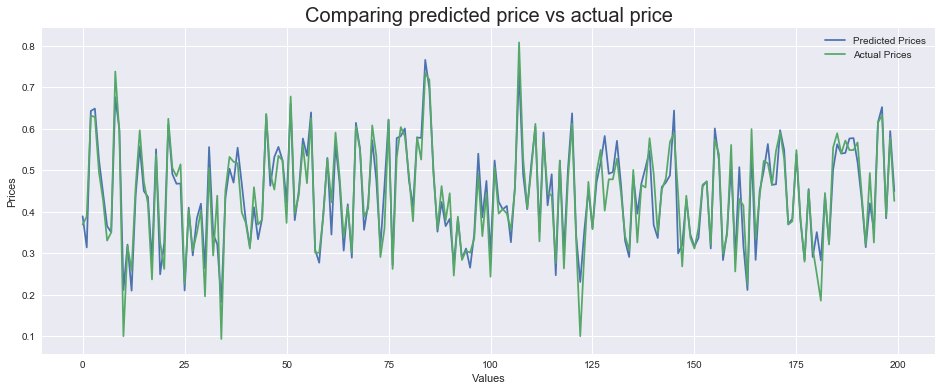

In [81]:
# performing the scikit-learn linear regression

X = trial_df1.drop(['price'],axis=1)
y = trial_df1.price

linreg, y_pred, y_test = linear_regression(X, y)

In [82]:
# cross-validation of results 

cross_validation(X, y, cv=15, show_scores=True)

Model Accuracy: -5.342928181772563e+23 %
[-3.16880825e+21 -6.46849532e+20 -1.10700963e+19  8.65391209e-01
 -6.09863866e+22 -1.80115166e+21  8.60447497e-01 -6.69032593e+21
  8.64624071e-01 -2.12422199e+21 -4.71510871e+21  8.83451641e-01
  8.71815528e-01  8.80822806e-01  8.93150374e-01]


In [83]:
# taking a look at the significant features 

significant_features = feature_selection(X, y)
print('Significant features:',len(significant_features),'\nAll features:',len(X.columns))

Significant features: 180 
All features: 298


R^2 Score: -3.3393044070519105e+20
Mean Absolute Error: 51064808.2593
Root Mean Squared Error: 4093155757.61854
-----------------------------------
Average Predicted Price: -51064807.7751
Average Actual Price: 0.4489


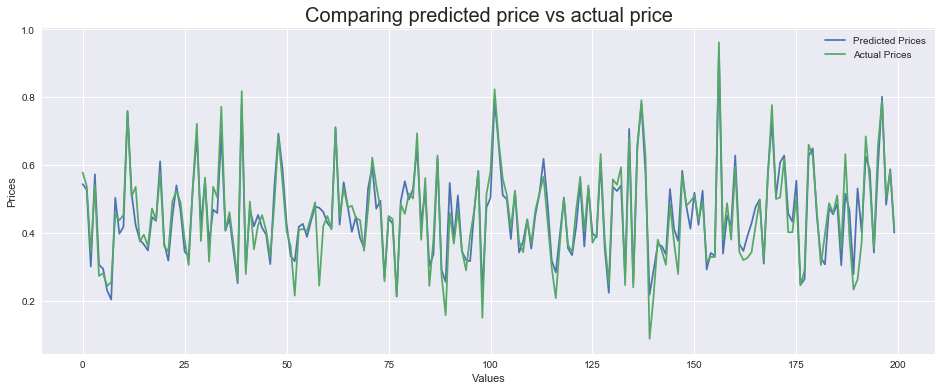

In [84]:
# performing the scikit-learn linear regression using the significant features that have p-value < 0.05

X = trial_df1[significant_features]
y = trial_df1.price
linreg, y_pred, y_test = linear_regression(X, y)

In [85]:
# cross-validation of results

cross_validation(X, y, cv=5)

Model Accuracy: -5.002075313403429e+22 %


In [86]:
# looking at the significant features that were used 

features = pd.DataFrame(linreg.coef_, index=significant_features, columns=['Features'])
features.sort_values(by='Features', ascending=False).head()

,Features
sqft_living,0.398921
zipcode_98039,0.337358
zipcode_98004,0.301659
zipcode_98112,0.284610
zipcode_98109,0.276360


### trial 2 - dealing with features and building linear regression model (3 main features):

In [87]:
# dealing with all the categorical features from the dataset

trial_df2.grade = trial_df2.grade.astype('category')
trial_df2.zipcode = trial_df2.zipcode.astype('category')

In [88]:
# making dummies for all the categorical features 

grade = pd.get_dummies(trial_df2.grade, prefix='grade', drop_first=True)
zipcode = pd.get_dummies(trial_df2.zipcode, prefix='zipcode', drop_first=True)

In [89]:
# adding dummies to the dataset and removing the original features 

trial_df2 = trial_df2.join([grade, zipcode])
trial_df2.drop(['grade', 'zipcode'], axis=1, inplace=True)

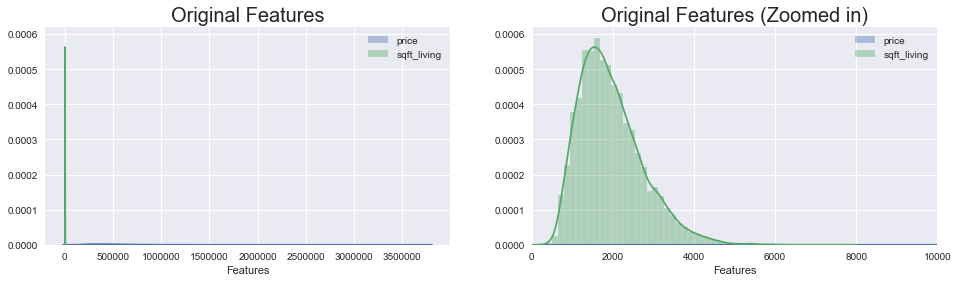

In [90]:
# displots on the continuous features from the dataset

plt.figure(figsize=(16,4))
plt.subplot(121)
sns.distplot(trial_df2.price, label='price')
sns.distplot(trial_df2.sqft_living, label='sqft_living')
plt.title('Original Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()

plt.subplot(122)
sns.distplot(trial_df2.price, label='price')
sns.distplot(trial_df2.sqft_living, label='sqft_living')
plt.title('Original Features (Zoomed in)', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.xlim(0, 10000)
plt.legend()
plt.show()

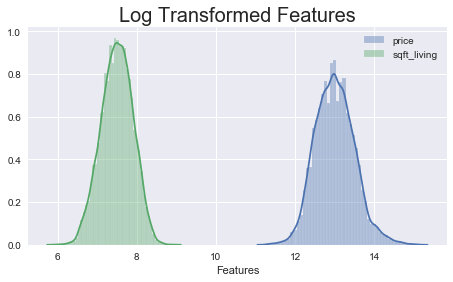

In [91]:
# logarithmic transformation on the continuous features

price = np.log(trial_df2.price)
sqft_living = np.log(trial_df2.sqft_living)

plt.figure(figsize=(7.5,4))
sns.distplot(price, label='price')
sns.distplot(sqft_living, label='sqft_living')

plt.title('Log Transformed Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

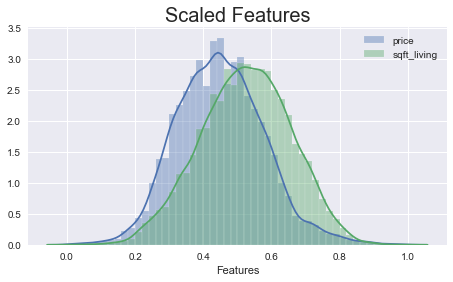

In [92]:
# performing min-max scaling on continuous features

trial_df2['price'] = ( price - min(price) ) / ( max(price) - min(price) )
trial_df2['sqft_living'] = ( sqft_living - min(sqft_living) ) / ( max(sqft_living) - min(sqft_living) )

plt.figure(figsize=(7.5,4))
sns.distplot(trial_df2.price, label='price')
sns.distplot(trial_df2.sqft_living, label='sqft_living')
plt.title('Scaled Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

R^2 Score: 0.87
Mean Absolute Error: 0.03449
Root Mean Squared Error: 0.04707
-----------------------------------
Average Predicted Price: 0.4504
Average Actual Price: 0.4501


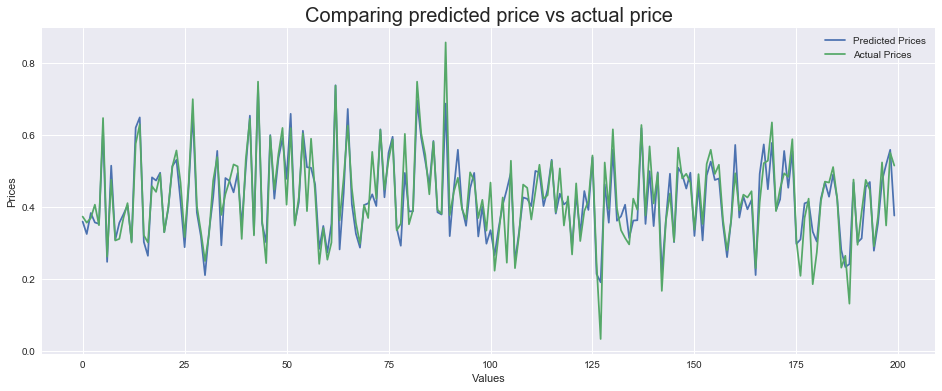

In [93]:
# performing the scikit-learn linear regression

X = trial_df2.drop(['price'],axis=1)
y = trial_df2.price

linreg, y_pred, y_test = linear_regression(X, y)

In [94]:
# cross-validation of results

cross_validation(X, y, cv=15, show_scores=True)

Model Accuracy: 87.0 %
[0.86293503 0.87086327 0.86553726 0.85507424 0.88404143 0.85827324
 0.85219598 0.87449687 0.85618459 0.86904489 0.86535046 0.87625814
 0.86688119 0.8720356  0.86195855]


In [95]:
# taking a look at the significant features 

significant_features = feature_selection(X, y)
print('Significant features:',len(significant_features),'\nAll features:',len(X.columns))

Significant features: 84 
All features: 92


R^2 Score: 0.86
Mean Absolute Error: 0.03485
Root Mean Squared Error: 0.04715
-----------------------------------
Average Predicted Price: 0.4495
Average Actual Price: 0.4511


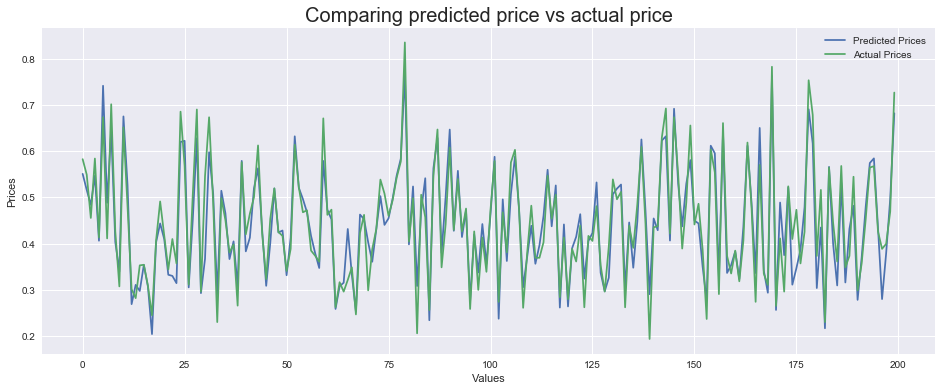

In [96]:
# performing the scikit-learn linear regression using the significant features that have p-value < 0.05

X = trial_df2[significant_features]
y = trial_df2.price
linreg, y_pred, y_test = linear_regression(X, y)

In [97]:
# cross-validation of results

cross_validation(X, y, cv=5)

Model Accuracy: 86.0 %


In [98]:
# looking at the significant features that were used 

features = pd.DataFrame(linreg.coef_, index=significant_features, columns=['Features'])
features.sort_values(by='Features', ascending=False).head()

,Features
sqft_living,0.413852
zipcode_98039,0.354044
zipcode_98004,0.295817
zipcode_98112,0.266757
zipcode_98102,0.254365


### trial 3 - dealing with features and building linear regression model (4 main features):

In [104]:
# dealing with all the categorical features from the dataset

trial_df3.bathrooms = trial_df3.bathrooms.astype('int').astype('category')
trial_df3.grade = trial_df3.grade.astype('category')
trial_df3.zipcode = trial_df3.zipcode.astype('category')

In [105]:
# making dummies for all the categorical features 

bathrooms = pd.get_dummies(trial_df3.bathrooms, prefix='bathrooms', drop_first=True)
grade = pd.get_dummies(trial_df3.grade, prefix='grade', drop_first=True)
zipcode = pd.get_dummies(trial_df3.zipcode, prefix='zipcode', drop_first=True)

In [106]:
# adding dummies to the dataset and removing the original features 

trial_df3 = trial_df1.join([bathrooms, grade, zipcode])
trial_df3.drop(['bathrooms', 'grade', 'zipcode'], axis=1, inplace=True)

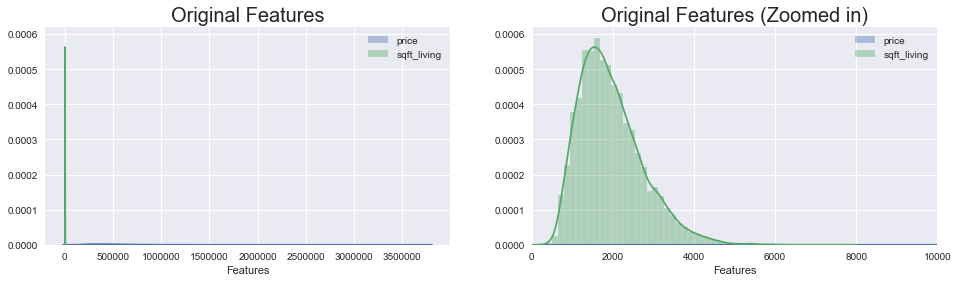

In [107]:
# displots on the continuous features from the dataset

plt.figure(figsize=(16,4))
plt.subplot(121)
sns.distplot(trial_df3.price, label='price')
sns.distplot(trial_df3.sqft_living, label='sqft_living')
plt.title('Original Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()

plt.subplot(122)
sns.distplot(trial_df3.price, label='price')
sns.distplot(trial_df3.sqft_living, label='sqft_living')
plt.title('Original Features (Zoomed in)', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.xlim(0, 10000)
plt.legend()
plt.show()

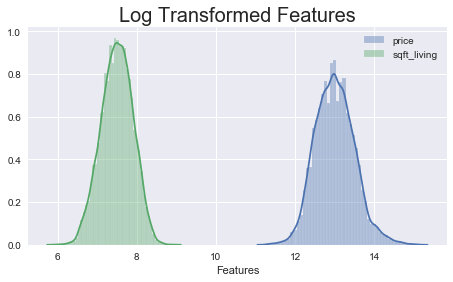

In [108]:
# logarithmic transformation on the continuous features

price = np.log(trial_df3.price)
sqft_living = np.log(trial_df3.sqft_living)

plt.figure(figsize=(7.5,4))
sns.distplot(price, label='price')
sns.distplot(sqft_living, label='sqft_living')

plt.title('Log Transformed Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

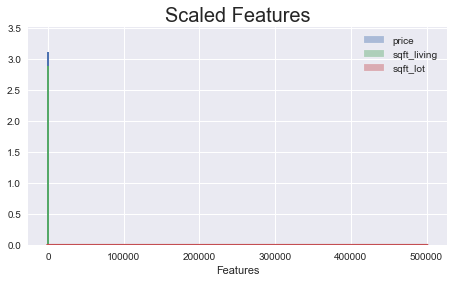

In [109]:
# performing min-max scaling on continuous features

trial_df3['price'] = ( price - min(price) ) / ( max(price) - min(price) )
trial_df3['sqft_living'] = ( sqft_living - min(sqft_living) ) / ( max(sqft_living) - min(sqft_living) )

plt.figure(figsize=(7.5,4))
sns.distplot(trial_df3.price, label='price')
sns.distplot(trial_df3.sqft_living, label='sqft_living')
sns.distplot(trial_df3.sqft_lot, label='sqft_lot')
plt.title('Scaled Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

R^2 Score: 0.87
Mean Absolute Error: 0.03433
Root Mean Squared Error: 0.04697
-----------------------------------
Average Predicted Price: 0.4491
Average Actual Price: 0.4496


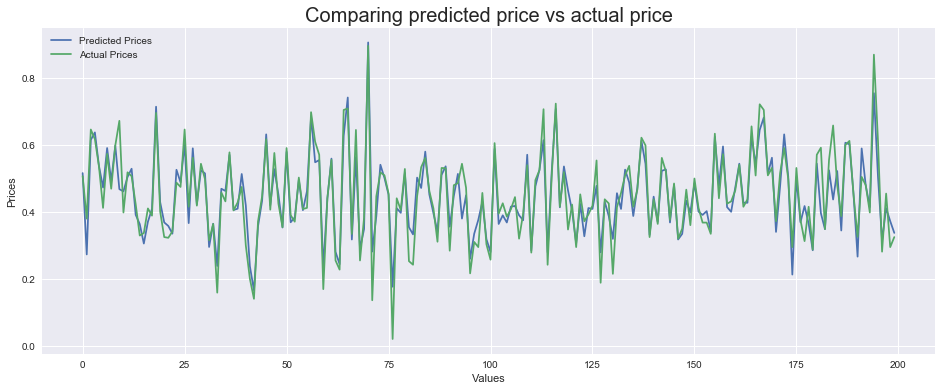

In [110]:
# performing the scikit-learn linear regression

X = trial_df3.drop(['price'],axis=1)
y = trial_df3.price

linreg, y_pred, y_test = linear_regression(X, y)

In [111]:
# cross-validation of results 

cross_validation(X, y, cv=15, show_scores=True)

Model Accuracy: 87.0 %
[0.86265925 0.87040252 0.86529639 0.85508909 0.88359448 0.85833798
 0.85205463 0.87338197 0.85591177 0.86867954 0.86553533 0.87523001
 0.86690901 0.87216095 0.86278742]


In [112]:
# taking a look at the significant features 

significant_features = feature_selection(X, y)
print('Significant features:',len(significant_features),'\nAll features:',len(X.columns))

Significant features: 83 
All features: 94


R^2 Score: 0.86
Mean Absolute Error: 0.03507
Root Mean Squared Error: 0.04749
-----------------------------------
Average Predicted Price: 0.4494
Average Actual Price: 0.4493


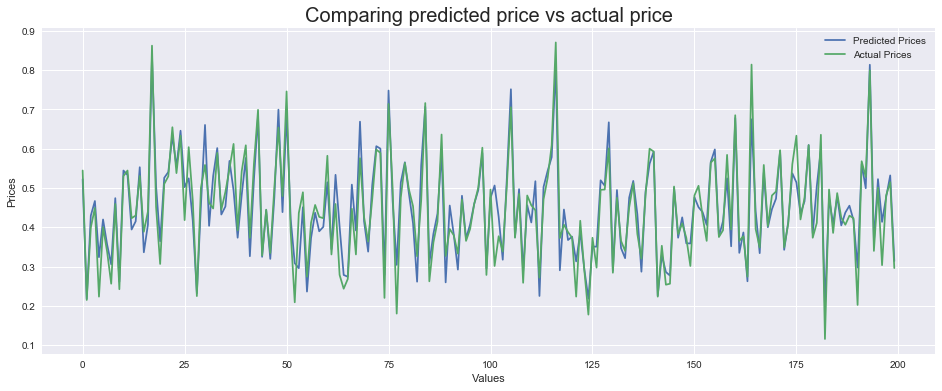

In [113]:
# performing the scikit-learn linear regression using the significant features that have p-value < 0.05

X = trial_df3[significant_features]
y = trial_df3.price
linreg, y_pred, y_test = linear_regression(X, y)

In [114]:
# cross-validation of results 

cross_validation(X, y, cv=5)

Model Accuracy: 86.0 %


In [115]:
# looking at the significant features that were used 

features = pd.DataFrame(linreg.coef_, index=significant_features, columns=['Features'])
features.sort_values(by='Features', ascending=False).head()

,Features
sqft_living,0.437916
zipcode_98039,0.351694
zipcode_98004,0.295351
zipcode_98112,0.272016
zipcode_98102,0.255598


# Interpreting Results:

#### Trail 1: (all features)

    (using all data of all columns) 
    After building the multiple linear regression, using all data of all columns, we arrived at an r^2 score of -3.028482607273709e+21, mean absolute error of 309657366.10192, and root mean squared error of 12326585937.87512. The average predicated price was -124809675.5103 and the average actual price was 0.4501. After performing a cross-validation on this model we got a model accuracy of -5.342928181772563e+23%.

    (using only significant features of all columns) 
    When controlling for significant features and only using those with p-value below 0.05 (180/298), we arrived at an r^2 score of -2.840620060808728e+19, mean absolute error of 14893620.23555, and root mean squared error of 1193814476.1172. The average predicted price was 14893620.6521 and the average actual price was 0.4516. The model accuracy was -5.002075313403429e+22% and the significant features that were used were yr_renovated = 9.569151e+10, sqft_living = 3.901095e-01, zipcode_98039 = 3.402089e-01, zipcode_98004 = 2.993370e-01, and zipcode_98112 = 2.831295e-01. 



#### Trial 2: (3 features - sqft_living, grade, zipcode)

    (using all data of columns choosen) 
    After building the multiple linear regression, using sqft_living, grade, and zipcode, we arrived at an r^2 score of .87, mean absolute error of 0.03426, and root mean squared error of 0.04694. The average predicated price was 0.4512 and the average actual price was 0.4501. After performing a cross-validation on this model we got a model accuracy of 87%.

    (using only significant features of columns choosen) 
    When controlling for significant features and only using those with p-value below 0.05 (84/92), we arrived at an r^2 score of 0.86, mean absolute error of 0.03448, and root mean squared error of 0.04709. The average predicted price was 0.4504 and the average actual price was 0.4496. The model accuracy was 86% and the significant features that were used were sqft_living = 0.411411, zipcode_98039 = 0.343526, zipcode_98004 = 0.294829, zipcode_98112 = 0.271750, and zipcode_98109 = 0.257680. 



#### Trial 3: (4 features - sqft_living, grade, zipcode, bathrooms)

    (using all data of columns choosen) 
    After building the multiple linear regression, using sqft_living, grade, zipcode, and bathrooms, we arrived at an r^2 score of .87, mean absolute error of 0.03445, and root mean squared error of 0.04721. The average predicated price was 0.4495 and the average actual price was 0.4489. After performing a cross-validation on this model we got a model accuracy of 87%.

    (using only significant features of columns choosen) 
    When controlling for significant features and only using those with p-value below 0.05 (83/94), we arrived at an r^2 score of 0.86, mean absolute error of 0.03497, and root mean squared error of 0.04755. The average predicted price was 0.4521 and the average actual price was 0.4524. The model accuracy was 86% and the significant features that were used were sqft_living = 0.431244, zipcode_98039 = 0.341099, zipcode_98004 = 0.293931, zipcode_98112 = 0.266607, and zipcode_98109 = 0.249996.

#### Further Elaboration: 

    After having done the trial 1 linear regression without extracting any of the features it is evident that the model was very bad. The accurary was on the negative side and it was nowhere close to predicting the house price at an accurate level or precision. After controlling for the features in trial 2 and only allowing for sqft_living, grade, and zipcode (which was one feature I never considered using until it came up as a significant feature in trial 1), the r^2 score skyrocketed from -3.028482607273709e+21 in trail 1 to .87 in trial 2 and the model accuracy was up to 87%. Curiously, when we only allowed significant features to drive our linear regression in trial 2, the r^2 score came down to .86 and the model acccuracy decreased to 86%. The mean absolute error and root mean squared error also went up, albeit, not by much. For trail 3 we added a fourth feature to the equation. This linear regression included, sqft_living, grade, zipcode, and bathrooms. After having performed this linear regression for trial 3, we observed that the results we obtained were extremely similar to those in trail 2, but there was a slight increase in mean absolute error and root mean error. 
    

    We can conclude from looking at all this that the best models came from trial 2 (3 features - sqft_living, grade, zipcode) to best predict house prices. The model without controlling for significant features did slightly better than the one that did, but the results we obtained don't seem to be that different from one another. Both models did extremely well. 

#### 3 Recommendations + Bonus: 

1. Make sure to focus a great deal on the living space (sqft) of the house when taking price into account. These two are very much positively correlated. This means that as living space square footage increases, so does the price. If there is one sole feature that will drive the price of a particular house up, it would have to be the sqare footage. 
    

2. Location, location, and location! Pay particular attention to the locality of the house. Particular zipcodes are associated with quite expensive homes and vice-versa. Although we didn't dive much into it in this project, it would be interesting to see the what the ratings of the schools are in these areas and the median salaries for people living in these regions. 
    
    
3. The grade of the home had a significant impact on the price of the homes as well. I'm not too sure what goes into the grading system that King County uses. It would be interesting to see what the variables are that are taken into account when grading a particular home. The grading system seems to be fairly distributed in terms of homes per particular grade. 


4. If there was a need to include a fourth feature when looking at house prices it would have to be bathrooms. I found it quite odd, to say the least, that bathrooms drove the price up more than did bedrooms. I would've assumed it would be the other way around, but after performing correlation analysis, it proved to be bathrooms first and bedrooms second. 